# Notebook para tratamento dos dados

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#style.use('seaborn')
%matplotlib inline


In [4]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    from sklearn import preprocessing, metrics


In [5]:
# !pip install -U scikit-fuzzy
import sys
import skfuzzy as fuzz
sys.setrecursionlimit(1000)

In [6]:
data_column_names = ["Date", "Time", "Epoch", "Moteid", "Temperature", "Humidity", "Light", "Voltage"]
dplot = pd.read_csv("../data.txt", sep = ' ', names = data_column_names)

S7df = dplot[dplot['Moteid']==7]
S9df = dplot[dplot['Moteid']==9]

In [7]:
S8df = pd.read_csv('dfImputation.csv')
S7df.shape,S8df.shape,S9df.shape

((55361, 8), (65543, 8), (49890, 8))

In [8]:
S8df['3'] = 8.0
S8df.head()

,0,1,2,3,4,5,6,7
0,2004-03-31,03:38:15.757551,0,8.0,0.0,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,1,8.0,0.0,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,2,8.0,0.0,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,3,8.0,0.0,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,4,8.0,0.0,38.83790,45.08,2.69964


In [9]:
# print(S1df.shape)
outliersIListaS2 = []
outliersIListaVS2 = []
for i, row in S7df.iterrows():
    if row['Temperature'] >=26.2:
        outliersIListaS2.append(i)
        outliersIListaVS2.append(row['Temperature'])
print(len(outliersIListaS2))


12481


In [10]:
# Removendo outliers no S1
passo3S1= S7df.copy()
print(passo3S1.shape)
passo3S1= passo3S1.drop(outliersIListaS2)
print(passo3S1.shape)
passo3S1.to_csv('S7FINAL.csv')

(55361, 8)
(42880, 8)


In [11]:
outliersIListaS1 = []
outliersIListaVS1 = []
for i, row in S9df.iterrows():
    if row['Temperature'] >=26.2:
        outliersIListaS1.append(i)
        outliersIListaVS1.append(row['Temperature'])
print(len(outliersIListaS1))


10022


In [13]:
# Removendo outliers no S2
passo3S2= S9df.copy()
print(passo3S2.shape)
passo3S2= passo3S2.drop(outliersIListaS1)
print(passo3S2.shape)
passo3S2.to_csv('S9FInal.csv')

(49890, 8)
(39868, 8)


In [12]:
outliersIListaS3 = []
outliersIListaVS3 = []
for i, row in S8df.iterrows():
    if row['4'] >=26.2:
        outliersIListaS3.append(i)
        outliersIListaVS3.append(row['4'])
print(len(outliersIListaS3))


0


In [13]:
# Removendo outliers no S33
passo3S33= S8df.copy()
print(passo3S33.shape)
passo3S33= passo3S33.drop(outliersIListaS3)
print(passo3S33.shape)
passo3S33.to_csv('S8FInal.csv')

(65543, 8)
(65543, 8)


In [14]:
S7df_ = pd.read_csv('S7FInal.csv')
S8df_ = pd.read_csv('S8FInal.csv')
S9df_ = pd.read_csv('S9FInal.csv')

S7df_.shape, S8df_.shape, S9df_.shape

((42880, 9), (65543, 9), (39868, 9))

# Sistema Fuzzy

In [15]:
# Modelo Fuzzy
temp = np.arange(-26.2, 26.2, 0.1)
tempF = np.arange(-26.2, 26.2, 0.1)

# Generate fuzzy membership functions
temp_lo = fuzz.trimf(temp, [-26.2, 0.0, 5.0])  
temp_md = fuzz.trimf(temp, [0.0, 5.0, 20.0])      
temp_hi = fuzz.trimf(temp, [17.20, 22.8, 26.2]) 


mfx = fuzz.trapmf(tempF, [-26.2, 5.0, 17.20, 26.2])


tempFinal_lo = fuzz.trapmf(tempF, [-26.2, 5.0, 17.20, 26.2]) 
tempFinal_md = fuzz.trimf(tempF, [0, 5.0, 20.0]) 
tempFinal_hi = fuzz.trimf(tempF, [17.20, 22.8, 26.2])


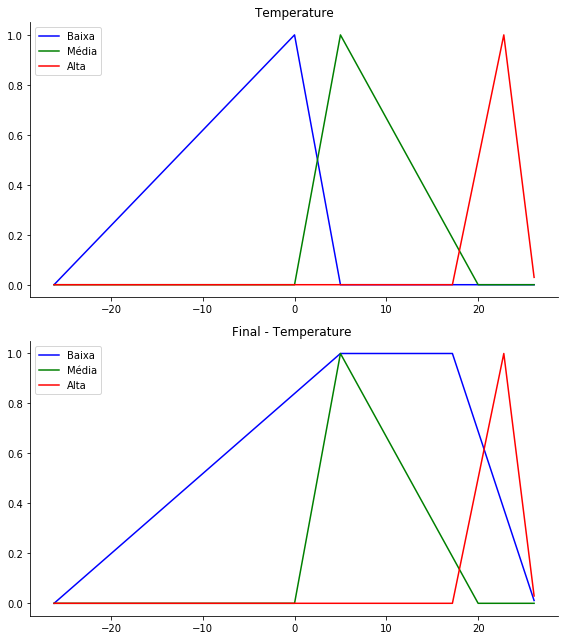

In [16]:
# Visualize these universes and membership functions
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))

ax0.plot(temp, temp_lo, 'b', linewidth=1.5, label='Baixa')
ax0.plot(temp, temp_md, 'g', linewidth=1.5, label='Média')
ax0.plot(temp, temp_hi, 'r', linewidth=1.5, label='Alta')
ax0.set_title('Temperature')
ax0.legend()

ax1.plot(tempF, tempFinal_lo, 'b', linewidth=1.5, label='Baixa')
ax1.plot(tempF, tempFinal_md, 'g', linewidth=1.5, label='Média')
ax1.plot(tempF, tempFinal_hi, 'r', linewidth=1.5, label='Alta')
ax1.set_title('Final - Temperature ')
ax1.legend()

# Turn off top/right axes
for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


In [17]:
def fuzification(i, data, data1, data2): 
    if data['3'].ix[i]== 8:
        temp_level_lo0 = fuzz.interp_membership(temp, temp_lo,  data1['Temperature'][i]) # ex: [52, [51, 52]]
        temp_level_md0 = fuzz.interp_membership(temp, temp_md,  data1['Temperature'][i])
        temp_level_hi0 = fuzz.interp_membership(temp, temp_hi,  data1['Temperature'][i])

        temp_level_lo1 = fuzz.interp_membership(temp, temp_lo,  data2['Temperature'][i])
        temp_level_md1 = fuzz.interp_membership(temp, temp_md,  data2['Temperature'][i])
        temp_level_hi1 = fuzz.interp_membership(temp, temp_hi,  data2['Temperature'][i])

        active_rule1_0 = np.fmin(temp_level_lo0, temp_level_lo1)
        active_rule1_1 = np.fmin(temp_level_lo0, temp_level_md1)
        active_rule1_2 = np.fmin(temp_level_lo0, temp_level_hi1)
        active_rule1_3 = np.fmin(temp_level_md0, temp_level_lo1)
        active_rule1_4 = np.fmin(temp_level_md0, temp_level_md1)
        active_rule1_5 = np.fmin(temp_level_md0, temp_level_hi1)
        active_rule1_6 = np.fmin(temp_level_hi0, temp_level_lo1)
        active_rule1_7 = np.fmin(temp_level_hi0, temp_level_md1)
        active_rule1_8 = np.fmin(temp_level_hi0, temp_level_hi1)


        active_rule1_Final_0 = np.fmax(active_rule1_0, tempFinal_lo)
        active_rule1_Final_1 = np.fmax(active_rule1_1, tempFinal_lo)
        active_rule1_Final_2 = np.fmax(active_rule1_2, tempFinal_md)
        active_rule1_Final_3 = np.fmax(active_rule1_3, tempFinal_lo)
        active_rule1_Final_4 = np.fmax(active_rule1_4, tempFinal_hi)
        active_rule1_Final_5 = np.fmax(active_rule1_5, tempFinal_hi)
        active_rule1_Final_6 = np.fmax(active_rule1_6, tempFinal_md)
        active_rule1_Final_7 = np.fmax(active_rule1_7, tempFinal_hi)
        active_rule1_Final_8 = np.fmax(active_rule1_8, tempFinal_hi)

        r1_0 = np.fmax(active_rule1_Final_8, np.fmax(active_rule1_Final_7, np.fmax(active_rule1_Final_6, active_rule1_Final_5) ) )  
        r1_1 = np.fmax(active_rule1_Final_5, np.fmax(active_rule1_Final_3, np.fmax(active_rule1_Final_2, np.fmax(active_rule1_Final_1, active_rule1_Final_0)) ) )  
        aggregated = np.fmax(r1_0,r1_1)
        return aggregated  


In [19]:
def defuzz(x, mfx, mode):
    """
    Defuzzification of a membership function, returning a defuzzified value
    of the function at x, using various defuzzification methods.

    Parameters
    ----------
    x : 1d array or iterable, length N
        Independent variable.
    mfx : 1d array of iterable, length N
        Fuzzy membership function.
    mode : string
        Controls which defuzzification method will be used.
        * 'centroid': Centroid of area
        * 'bisector': bisector of area
        * 'mom'        : mean of maximum
        * 'som'        : min of maximum
        * 'lom'        : max of maximum

    Returns
    -------
    u : float or int
        Defuzzified result.

    See also
    --------
    CENTROID, DCENTROID

    """
    mode = mode.lower()
    x = x.ravel()
    mfx = mfx.ravel()
    n = len(x)
    assert n == len(mfx), 'Length of x and fuzzy membership function must be \
                          identical.'

    if 'Centroid' in mode or 'bisector' in mode:
        tot_area = mfx.sum()
        assert tot_area != 0, 'Total area is zero in defuzzification!'

        if 'Centroid' in mode:
            return centroid(x, mfx)

        elif 'bisector' in mode:
            tmp = 0
            for k in range(n):
                tmp += mfx[k]
                if tmp >= tot_area / 2.:
                    return x[k]

    elif 'mom' in mode:
        return np.mean(x[mfx == mfx.max()])

    elif 'som' in mode:
        tmp = x[mfx == mfx.max()]
        return tmp[tmp == np.abs(tmp).min()][0]

    elif 'lom' in mode:
        tmp = x[mfx == mfx.max()]
        return tmp[tmp == np.abs(tmp).max()][0]

    else:
        raise ValueError('The input for `mode`, %s, was incorrect.' % (mode))



In [21]:
S8df_.head(1)

,Unnamed: 0,0,1,2,3,4,5,6,7
0,0,2004-03-31,03:38:15.757551,0,8.0,17.1,-3.91901,11.04,2.03397


In [20]:
aux = 0.0
for i, row in S8df_.iterrows():
        if S8df_['4'][i] == 0.0:            
            try:
                S8df_.at[i, '4'] = defuzz(tempF,fuzification(i, S8df_, S7df_, S9df_ ), 'lom')
                aux = defuzz(tempF,fuzification(i, S8df_, S7df_, S9df_ ), 'lom')
            except:
                S8df_.at[i, '4'] = aux
                
S8df_.tail()

,Unnamed: 0,0,1,2,3,4,5,6,7
65538,65538,2004-03-02,11:54:16.104475,65531,8.0,17.1,33.0009,412.16,2.67532
65539,65539,2004-03-02,11:54:31.292936,65532,8.0,17.1,32.9308,412.16,2.67532
65540,65540,2004-03-02,11:55:23.747216,65533,8.0,17.1,33.0009,412.16,2.67532
65541,65541,2004-03-02,11:56:15.320018,65534,8.0,17.1,32.9308,412.16,2.67532
65542,65542,2004-03-02,11:56:29.016964,65535,8.0,17.1,32.9659,412.16,2.67532


In [22]:
print(S8df_.shape)
S8df_.to_csv('finalS8.csv', index=False)


(65543, 9)


# Final